In [41]:
using MGVInference
using Distributions
using Random
using ValueShapes
using LinearAlgebra
using Plots

In [2]:
param_size = 5

x1_grid = [Float64(i) for i in 1:25]
x2_grid = [i + 0.5 for i in 1:15]
common_grid = sort(vcat(x1_grid, x2_grid))

function line(x_grid, p)
    p[1]*10 .+ p[2] .* x_grid .+ p[3] .* x_grid.^2/5. .+ p[4] .* x_grid.^3/10.
end

function full_model(p)
    dist1 = Product(Normal.(line(x1_grid, p), p[5]^2*20))
    dist2 = Product(Normal.(line(x2_grid, p), p[5]^2*20))
    NamedTupleDist(a=dist1,
                   b=dist2)
end

full_model (generic function with 1 method)

In [31]:
true_params = randn(param_size); true_params[5] = abs(true_params[5])
display(true_params)
data = rand(full_model(true_params), 1)[1]
starting_point = randn(param_size)
display(starting_point)

5-element Array{Float64,1}:
 -1.8988838356396889
 -1.3383543617991958
  0.21768544037580004
 -0.06719192609353279
  1.2690290085788216

5-element Array{Float64,1}:
  0.9482407524292448
 -0.6164125657061644
 -0.2987439603144159
 -0.36198768078012117
  2.192538042769683

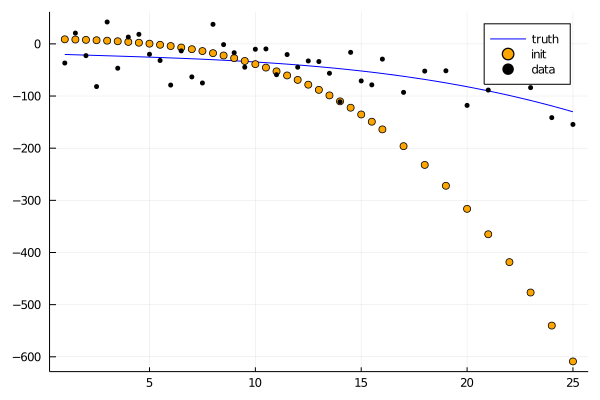

In [32]:
init_plots =() -> let
    truth = line(common_grid, true_params)
    plot!(common_grid, truth, markercolor=:blue, linecolor=:blue, label="truth")
    scatter!(common_grid, line(common_grid, starting_point), markercolor=:orange, label="init")
    scatter!(vcat(x1_grid, x2_grid), MGVInference.unshaped(data), markercolor=:black, markersize=3, label="data")
end
plot()
init_plots()

In [33]:
first_iteration = mgvi_kl_optimize_step(full_model, data, starting_point)

display(hcat(first_iteration, true_params))

5×2 Array{Float64,2}:
 -0.376607   -1.89888
 -0.0675114  -1.33835
  0.0821206   0.217685
 -0.0758148  -0.0671919
 -2.59653     1.26903

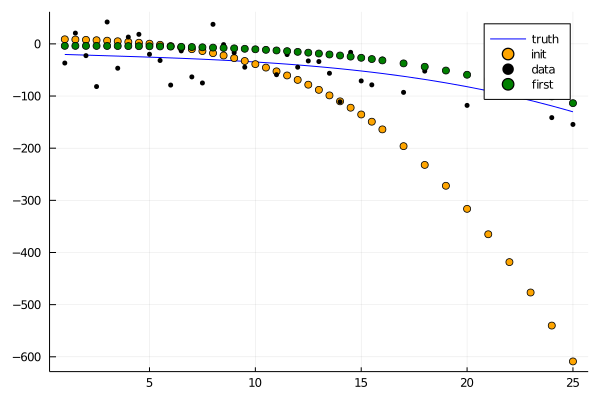

In [34]:
plot_iteration = (params, label) -> let
    #error_mat = mgvi_kl_errors(full_model, params)
    #display(error_mat)
    #errors = sqrt.(error_mat[diagind(error_mat)])
    #yerr = abs.(line(common_grid, params+errors) - line(common_grid, params-errors))
    #scatter!(common_grid, line(common_grid, params), markercolor=:green, label=label, yerr=yerr)
    scatter!(common_grid, line(common_grid, params), markercolor=:green, label=label)
end
    
plot()
init_plots()
plot_iteration(first_iteration, "first")

In [35]:
plot_iteration_light = (params, counter) -> let
    scatter!(common_grid, line(common_grid, params), markercolor=:green, markersize=3, markeralpha=2*atan(counter/18)/π, label=nothing)
end

#35 (generic function with 1 method)

5×2 Array{Float64,2}:
 -0.376607   -1.89888
 -0.0675114  -1.33835
  0.0821206   0.217685
 -0.0758148  -0.0671919
 -2.59653     1.26903

5×2 Array{Float64,2}:
 -0.694176   -1.89888
 -0.355573   -1.33835
 -0.35727     0.217685
 -0.0660082  -0.0671919
 -2.53348     1.26903

5×2 Array{Float64,2}:
 -0.582105   -1.89888
 -0.259301   -1.33835
 -0.218642    0.217685
 -0.0867791  -0.0671919
 -3.10082     1.26903

5×2 Array{Float64,2}:
 -0.612641   -1.89888
 -0.280834   -1.33835
 -0.237678    0.217685
 -0.0568349  -0.0671919
 -2.67543     1.26903

5×2 Array{Float64,2}:
 -0.389653   -1.89888
 -0.223717   -1.33835
 -0.255039    0.217685
 -0.0392855  -0.0671919
 -3.14183     1.26903

5×2 Array{Float64,2}:
 -0.695049   -1.89888
 -0.341351   -1.33835
 -0.337648    0.217685
 -0.0486132  -0.0671919
 -2.21301     1.26903

5×2 Array{Float64,2}:
 -0.684483   -1.89888
 -0.481957   -1.33835
 -0.659374    0.217685
 -0.0169069  -0.0671919
 -2.38656     1.26903

5×2 Array{Float64,2}:
 -0.607998    -1.89888
 -0.494887    -1.33835
 -0.724677     0.217685
  0.00862449  -0.0671919
 -2.7929       1.26903

5×2 Array{Float64,2}:
 -0.449043   -1.89888
 -0.357726   -1.33835
 -0.511301    0.217685
 -0.0657527  -0.0671919
 -2.25797     1.26903

5×2 Array{Float64,2}:
 -0.80404    -1.89888
 -0.49146    -1.33835
 -0.595534    0.217685
 -0.0292893  -0.0671919
 -3.39921     1.26903

5×2 Array{Float64,2}:
 -0.634858   -1.89888
 -0.356978   -1.33835
 -0.401766    0.217685
 -0.0500871  -0.0671919
 -2.53428     1.26903

5×2 Array{Float64,2}:
 -0.720171   -1.89888
 -0.497622   -1.33835
 -0.662092    0.217685
 -0.0391849  -0.0671919
 -2.9617      1.26903

5×2 Array{Float64,2}:
 -0.613663   -1.89888
 -0.402844   -1.33835
 -0.512571    0.217685
 -0.0619953  -0.0671919
 -2.36626     1.26903

5×2 Array{Float64,2}:
 -0.527854   -1.89888
 -0.257514   -1.33835
 -0.232882    0.217685
 -0.0331918  -0.0671919
 -2.43153     1.26903

5×2 Array{Float64,2}:
 -1.16517    -1.89888
 -0.815794   -1.33835
 -1.11771     0.217685
  0.0752608  -0.0671919
 -3.13076     1.26903

5×2 Array{Float64,2}:
 -0.40372    -1.89888
 -0.234636   -1.33835
 -0.276588    0.217685
 -0.0534573  -0.0671919
 -2.98782     1.26903

5×2 Array{Float64,2}:
 -0.555716   -1.89888
 -0.431501   -1.33835
 -0.615886    0.217685
 -0.0506588  -0.0671919
 -2.91475     1.26903

5×2 Array{Float64,2}:
 -0.662248     -1.89888
 -0.48262      -1.33835
 -0.676292      0.217685
  0.000890686  -0.0671919
 -2.61105       1.26903

5×2 Array{Float64,2}:
 -0.965577   -1.89888
 -0.541      -1.33835
 -0.61135     0.217685
 -0.0389518  -0.0671919
 -2.72483     1.26903

5×2 Array{Float64,2}:
 -0.712651   -1.89888
 -0.473624   -1.33835
 -0.617548    0.217685
 -0.0580314  -0.0671919
 -1.96728     1.26903

5×2 Array{Float64,2}:
 -0.603224  -1.89888
 -0.382636  -1.33835
 -0.486526   0.217685
 -0.027336  -0.0671919
 -3.03518    1.26903

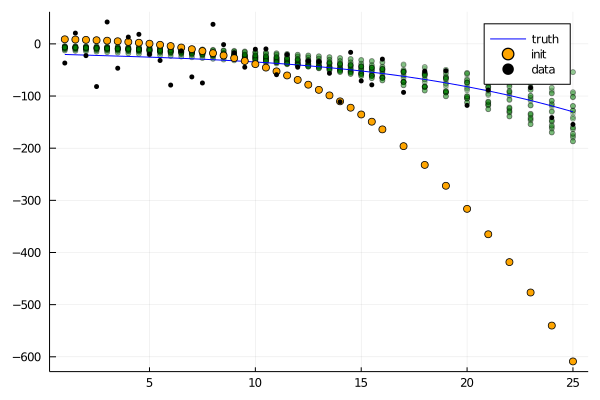

In [39]:
plt = scatter()
next_iteration = first_iteration
for i in 1:20
    display(hcat(next_iteration, true_params))
    next_iteration = mgvi_kl_optimize_step(full_model, data, next_iteration; residual_sampler=ImplicitResidualSampler)
    plot_iteration_light(next_iteration, i)
end
display(hcat(next_iteration, true_params))

init_plots()
display(plt)

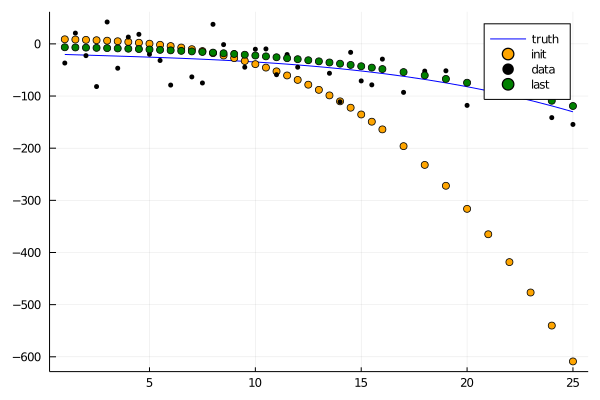

In [40]:
plot()
init_plots()
plot_iteration(next_iteration, "last")